# Importing and Organizing Data

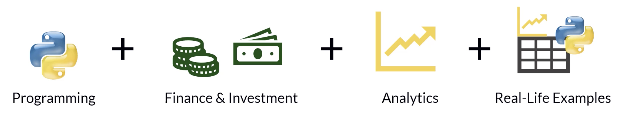

The amount of data is constantly changing. By using free sources of data we are bound to stumble upon missing values and poorly structured data with erroneous values. Nevertheless, the important skills obtained in this course are universal. Furthermore, data is a secondary ingredient for financial analysis.

Sources of financial data:
* Webserver - connecting through an API to online financial data sources (iex, MorningStart, Alpha Advantage, Quandl) that are constantly updated and read using pandas-datareader
* Local computer - certain types of files present in our local computer: CSV (comma-separated value) format

It is usually much harder to clean and maintain your data well than it is to conduct the subsequent business or financial analysis

Why bother with local CSV files when webservices provide up-to-date information?
* Webserver are prone to becoming unavailable for unknown periods of time.
* A certain API might contain only partial data needed for you analysis
    * Multiple-stock data, market indices data, foreign stock data
* Yahoo Finance API is the free API we'll use throughout the course.
    * Alternatives: MorningStar and Alpha Vantage
    * iex (python3 only)
* Google Finance API was available but it was discontinued

For this course, to be sure the entire financial part of the course flows smoothly from start to end, use the attached CSV files.

In [1]:
import numpy as np
import pandas as pd

Serias are single column data - a set of observations related to a single variable

In [2]:
ser = pd.Series(np.random.random(5), name='Column 01')

In [3]:
ser

0    0.210331
1    0.492089
2    0.634173
3    0.412537
4    0.676943
Name: Column 01, dtype: float64

Think of a Series type as a dictionary which values are of the same data type - therefore, you could access values with a key (or index)

In [4]:
ser[2]

0.6341725441419064

## Reading from web APIs

The DataFrame type is like a Series, only with multiple columns

In [5]:
from pandas_datareader import data as wb

wb standing for 'web'

In [6]:
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')

PG is the ticker with which a company sells their stocks in the market. AAPL is Apple's ticker, MSFT is Microsoft's ticker

In [7]:
PG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.625000,15.437500,15.468750,15.593750,3318400.0,6.280613
1995-01-04,15.656250,15.312500,15.531250,15.468750,2218800.0,6.230266
1995-01-05,15.437500,15.218750,15.375000,15.250000,2319600.0,6.142162
1995-01-06,15.406250,15.156250,15.156250,15.281250,3438000.0,6.154748
1995-01-09,15.406250,15.187500,15.343750,15.218750,1795200.0,6.129573
...,...,...,...,...,...,...
2020-08-11,134.740005,132.789993,134.270004,133.229996,5329900.0,133.229996
2020-08-12,135.970001,133.699997,133.770004,135.460007,5920400.0,135.460007
2020-08-13,135.869995,134.929993,135.080002,135.779999,4989500.0,135.779999


Once loaded, look at the data first - it can prevent losing valuable time, find anything wrong sooner rather than later. This data we extracted is a time series. At every given day, PG's selling data would be recorded and here we can see it.
* Adj. Closing prices for the first years look small if compared to the closing price we see in column 'Close'. But, at the end of the period, the Adj. close price is equal to the 'Close' price. The difference is due payment of dividends and to changes in the stock price (increases of capital, stock splits, and so on)
* No data for national holidays and weekends - as the stock market is closed.

Conclusion: The data is clean and well organized

In [8]:
PG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6452 entries, 1995-01-03 to 2020-08-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       6452 non-null   float64
 1   Low        6452 non-null   float64
 2   Open       6452 non-null   float64
 3   Close      6452 non-null   float64
 4   Volume     6452 non-null   float64
 5   Adj Close  6452 non-null   float64
dtypes: float64(6)
memory usage: 352.8 KB


In [9]:
PG.head(10)  # see the first 10 rows in the dataset

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,6.280613
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,6.230266
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,6.142162
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,6.154748
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,6.129573
1995-01-10,15.43750,15.18750,15.28125,15.40625,4364000.0,6.205094
1995-01-11,15.59375,15.37500,15.59375,15.37500,3738400.0,6.192507
1995-01-12,15.53125,15.31250,15.37500,15.53125,3307600.0,6.255436
1995-01-13,15.84375,15.53125,15.59375,15.62500,3992800.0,6.438290


In [10]:
PG.tail(10)  # see the last 10 rows in the dataset

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-04,133.929993,130.699997,130.770004,133.789993,7773700.0,133.789993
2020-08-05,134.649994,133.119995,133.589996,133.440002,5680000.0,133.440002
2020-08-06,133.369995,132.119995,132.850006,132.710007,3974100.0,132.710007
2020-08-07,133.639999,132.449997,132.889999,133.550003,4934100.0,133.550003
2020-08-10,134.440002,133.190002,133.699997,134.100006,5812700.0,134.100006
2020-08-11,134.740005,132.789993,134.270004,133.229996,5329900.0,133.229996
2020-08-12,135.970001,133.699997,133.770004,135.460007,5920400.0,135.460007
2020-08-13,135.869995,134.929993,135.080002,135.779999,4989500.0,135.779999
2020-08-14,135.639999,134.550003,135.610001,135.100006,5845200.0,135.100006


In [11]:
tickers = ['PG', 'MSFT', 'T', 'F', 'GE']
new_data = pd.DataFrame()
for t in tickers:
    new_data[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

This will only work if the data is organized the same way and with the same column names for all companies. Each key (the ticker) in the DataFrame will get a Series of data from the DataReader

In [12]:
new_data

,PG,MSFT,T,F,GE
Date,,,,,
1995-01-03,6.280613,2.406834,5.629794,3.262354,2.725145
1995-01-04,6.230266,2.424330,5.653112,3.350130,2.725145
1995-01-05,6.142162,2.384342,5.741443,3.320871,2.731823
1995-01-06,6.154748,2.424330,5.741443,3.320871,2.718464
1995-01-09,6.129573,2.409335,5.723777,3.379390,2.691748
...,...,...,...,...,...
2020-08-11,133.229996,203.380005,30.200001,7.230000,6.730000
2020-08-12,135.460007,209.190002,30.180000,7.110000,6.720000
2020-08-13,135.779999,208.699997,29.910000,7.030000,6.600000


## Quandl

Loading data in Python is not always as straightforward as presumed. Let's see how we can import data with quandl.

In [13]:
import quandl

In [14]:
mydata_01 = quandl.get("FRED/GDP")

In [15]:
mydata_01.tail()

,Value
Date,
2019-04-01,21329.877
2019-07-01,21540.325
2019-10-01,21747.394
2020-01-01,21561.139
2020-04-01,19408.759


In [16]:
import pandas as pd

In [17]:
mydata_01.to_csv("~/Developer/jupyter/example01.csv")

In [18]:
mydata_02 = pd.read_csv("~/Developer/jupyter/example01.csv")

In [19]:
mydata_02.tail()

,Date,Value
289,2019-04-01,21329.877
290,2019-07-01,21540.325
291,2019-10-01,21747.394
292,2020-01-01,21561.139
293,2020-04-01,19408.759


Loading and writing Excel files - the steps are the same, just point to xlsx files instead of csv.

Python automatically assigns numbers to every line of your dataset for a default integer index - we might choose a different column to server as index for our data.

In [20]:
mydata_02 = pd.read_csv("~/Developer/jupyter/example01.csv", index_col="Date")

In [21]:
mydata_02.tail()

,Value
Date,
2019-04-01,21329.877
2019-07-01,21540.325
2019-10-01,21747.394
2020-01-01,21561.139
2020-04-01,19408.759


Another way to change the index is by means of the method set_index() which returns the dataset indexed by the selected column. Therefore, we need to reassign mydata_02:

In [22]:
mydata_02 = pd.read_csv("~/Developer/jupyter/example01.csv")

In [23]:
mydata_02 = mydata_02.set_index("Date")

In [24]:
mydata_02

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2019-04-01,21329.877
2019-07-01,21540.325
2019-10-01,21747.394
